### 1. Collecting the Data

In [1]:
import pandas as pd

df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [2]:
df.shape

(20000, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### 2. Exploratory Data Analysis

In [4]:
df['letter'].value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [5]:
len(df['letter'].unique())

26

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


Here, all the values of the columns are ranging from 0 to 15.

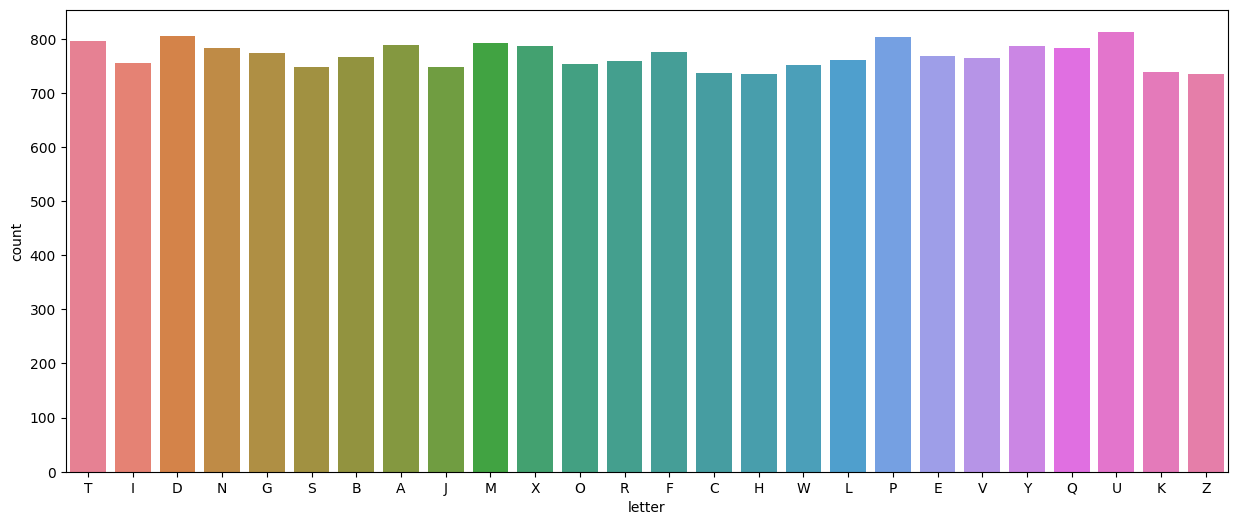

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x = 'letter', hue='letter')
plt.show()

As we can observe that, the letter 'U' is repeated most of the times. We can say that mode of the column 'letter' is 'U'.

### 3. Data Partition

In [8]:
X = df.drop(df[['letter']], axis = 1)
Y = df[['letter']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [10]:
# One-hot encode the target variable
y_train_encoded = pd.get_dummies(y_train['letter'], prefix='', dtype=int)
y_test_encoded = pd.get_dummies(y_test['letter'], prefix='', dtype=int)

In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Activation # type: ignore


In [12]:
y_train.shape

(16000, 1)

### 4. Model Fitting

In [13]:
# Create the ANN model
model = Sequential()

# Input layer with 128 neurons
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Output layer with 26 neurons (one for each alphabet)
model.add(Dense(26, activation='softmax'))

# 2.4 Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
import numpy as np

# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3488 - loss: 2.3553 - val_accuracy: 0.7070 - val_loss: 1.0472
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.7271 - loss: 0.9973 - val_accuracy: 0.7728 - val_loss: 0.8221
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7789 - loss: 0.7690 - val_accuracy: 0.8108 - val_loss: 0.6703
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8015 - loss: 0.6704 - val_accuracy: 0.8140 - val_loss: 0.6312
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8322 - loss: 0.5678 - val_accuracy: 0.8535 - val_loss: 0.5183
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.8526 - loss: 0.4874 - val_accuracy: 0.8635 - val_loss: 0.4619
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.8746 - loss: 0.4271 - val_accuracy: 0.8652 - val_loss: 0.4424
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8760 - loss: 0.4054 - 

In [15]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9602 - loss: 0.1549
Test Loss: 0.15546457469463348
Test Accuracy: 0.9602500200271606


In [16]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Decode the predicted classes back to alphabet letters
alphabet_mapping = {i: chr(ord('A') + i) for i in range(26)}  # Mapping for one-hot encoding to alphabet
predicted_letters = [alphabet_mapping[predicted_class] for predicted_class in predicted_classes]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_letters)
precision = precision_score(y_test, predicted_letters, average='macro')
recall = recall_score(y_test, predicted_letters, average='macro')
f1 = f1_score(y_test, predicted_letters, average='macro')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)

Test Accuracy: 0.96025
Test Precision: 0.9601537003258952
Test Recall: 0.9601324030908468
Test F1-Score: 0.9598601265933385


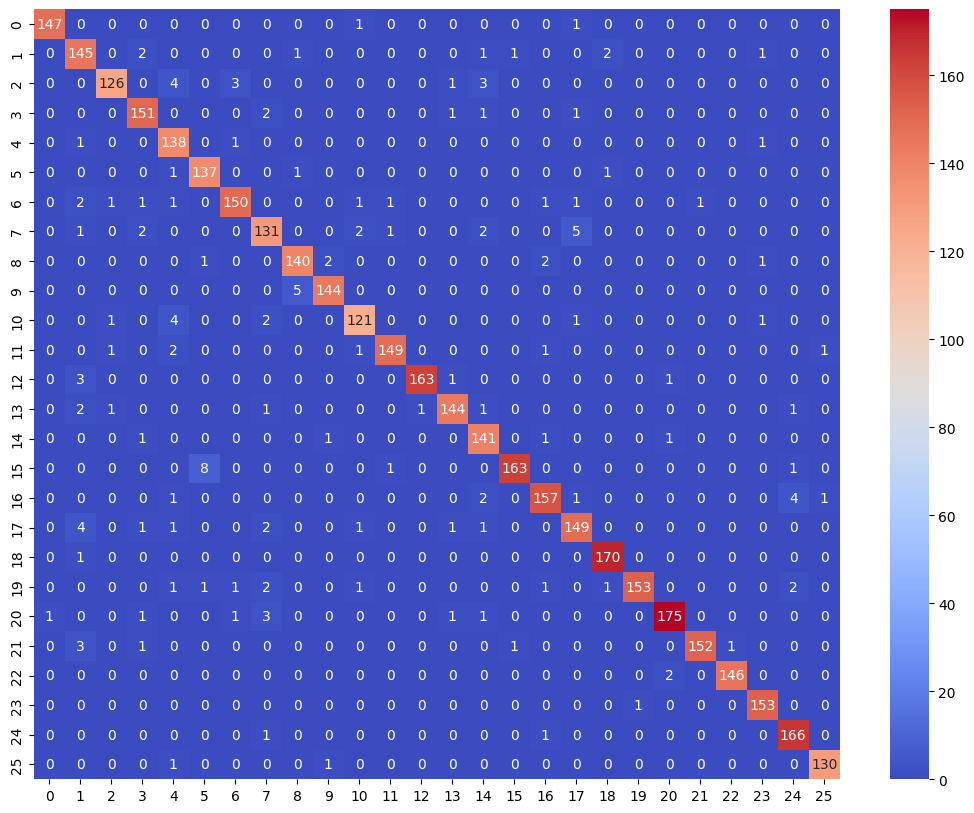

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_letters)

import seaborn as sns
plt.figure(figsize=(13, 10))
sns.heatmap(cm, cmap='coolwarm', annot=True, fmt='g')
plt.show()

After implementing 100 epochs, we have got the test accuracy and test error as 96.02% and 0.155.

From the above confusion matrix, we can say that almost most of the data points are predicted correctly.

#### 4.1 Implementing Early Stopping

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

# 2.4 Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2.5 Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# 2.6 Train the model with EarlyStopping
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,  # Increased epochs for demonstration
    batch_size=32,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping]
)

Epoch 1/100


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3599 - loss: 2.3123 - val_accuracy: 0.7117 - val_loss: 1.0709
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7221 - loss: 1.0043 - val_accuracy: 0.7663 - val_loss: 0.8645
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7718 - loss: 0.8055 - val_accuracy: 0.7987 - val_loss: 0.6851
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.8097 - loss: 0.6555 - val_accuracy: 0.8397 - val_loss: 0.5898
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8291 - loss: 0.5772 - val_accuracy: 0.8472 - val_loss: 0.5331
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8501 - loss: 0.5064 - val_accuracy: 0.8508 - val_loss: 0.5040
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.8632 - loss: 0.4560 - val_accuracy: 0.8733 - val_loss: 0.4327
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.8763 - loss: 0.4113 - val_accura

In [39]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9510 - loss: 0.1531
Test Loss: 0.1446213573217392
Test Accuracy: 0.9555000066757202


In [40]:
# 2.7 Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# 2.8 Decode the predicted classes back to alphabet letters
alphabet_mapping = {i: chr(ord('A') + i) for i in range(26)}  # Mapping for one-hot encoding to alphabet
predicted_letters = [alphabet_mapping[predicted_class] for predicted_class in predicted_classes]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_letters)
precision = precision_score(y_test, predicted_letters, average='macro')
recall = recall_score(y_test, predicted_letters, average='macro')
f1 = f1_score(y_test, predicted_letters, average='macro')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)

Test Accuracy: 0.9555
Test Precision: 0.95562285519175
Test Recall: 0.9552769175162854
Test F1-Score: 0.9549959505454078


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_letters)
cm

array([[147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 149,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 128,   0,   2,   0,   2,   0,   0,   0,   0,   1,   0,
          0,   2,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0, 149,   0,   1,   1,   2,   0,   0,   1,   0,   0,
          1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 140,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   4, 130,   0,   0,   1,   0,   0,   0,   0,
          1,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   1,   4,   0, 143,   0,   0,   0,   2,   0,   0,
          0,   0,   0,   1,   1,   0,   0,   

##### Visualizing Confusion matrix

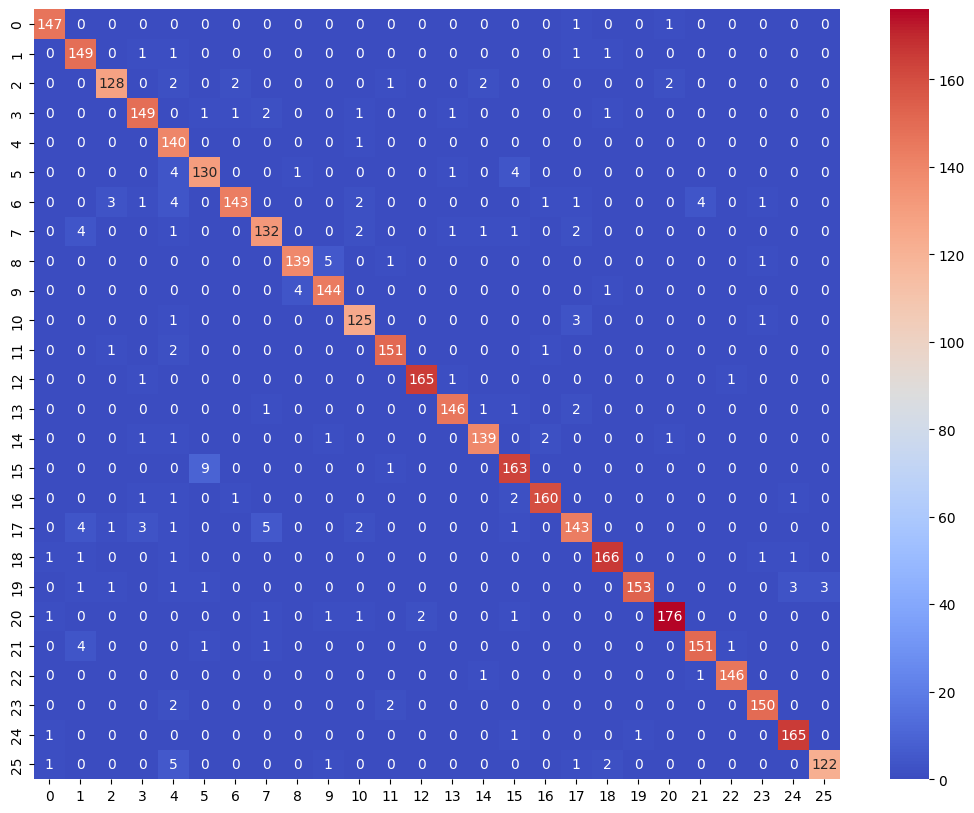

In [43]:
import seaborn as sns
plt.figure(figsize=(13, 10))
sns.heatmap(cm, cmap='coolwarm', annot=True, fmt='g')
plt.show()

In [44]:
model_loss = pd.DataFrame(history.history)
model_loss.head()

,accuracy,loss,val_accuracy,val_loss
0,0.527062,1.684323,0.71175,1.070944
1,0.738250,0.944235,0.76625,0.864458
2,0.781187,0.766877,0.79875,0.685090
3,0.811000,0.646910,0.83975,0.589764
4,0.833250,0.563835,0.84725,0.533108


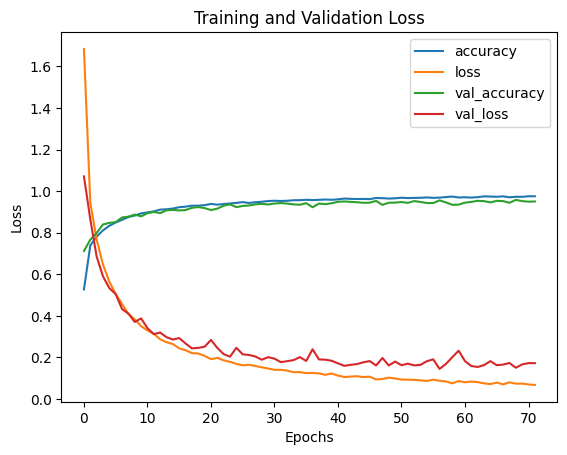

In [45]:
model_loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### 4.2 Hyper parameter tuning

In [27]:
def create_model(neurons=128, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(26, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [28]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(26, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 2.2 Create KerasClassifier Object
model = KerasClassifier(model=create_model, 
                        epochs=10,
                        batch_size=32, 
                        verbose=0,
                        activation = 'relu',
                        neurons = 64,
                        callbacks=[early_stopping])

# 2.3 Define Hyperparameter Grid
param_grid = {
    'neurons': [64, 128, 256],
    'optimizer': ['adam', 'rmsprop', 'SGD']
}

# 2.6 Grid Search with Cross-Validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)  # 5-fold cross-validation
grid_result = grid.fit(X_train, y_train_encoded)

# 2.7 Best Model and Evaluation
best_model = grid_result.best_estimator_
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Data Science\DS Assi

Best Parameters: {'neurons': 256, 'optimizer': 'adam'}


In [29]:
predictions = best_model.predict(X_test)
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# 2.8 Decode the predicted classes back to alphabet letters
alphabet_mapping = {i: chr(ord('A') + i) for i in range(26)}  # Mapping for one-hot encoding to alphabet
predicted_letters = [alphabet_mapping[predicted_class] for predicted_class in predicted_classes]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_letters)
precision = precision_score(y_test, predicted_letters, average='macro')
recall = recall_score(y_test, predicted_letters, average='macro')
f1 = f1_score(y_test, predicted_letters, average='macro')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)

Test Accuracy: 0.91575
Test Precision: 0.9210515200922311
Test Recall: 0.9164069795782424
Test F1-Score: 0.9153914407865151
